In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Reading the csv file.

df=pd.read_csv('crimeData.data',names=['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop'])
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [28]:
# checking col datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [29]:
#Describe
df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


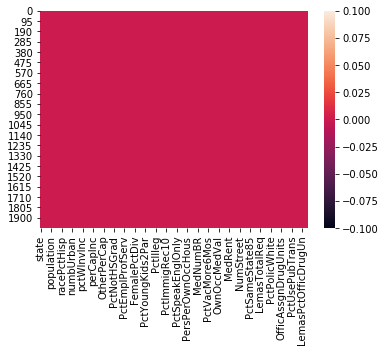

In [30]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [31]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

ViolentCrimesPerPop      0
PolicBudgPerPop          0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
                        ..
MedRent                  0
MedRentPctHousInc        0
MedOwnCostPctInc         0
MedOwnCostPctIncNoMtg    0
state                    0
Length: 128, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
df['communityname']= le.fit_transform(df['communityname']) 
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,804,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,1625,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,1,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,1787,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,141,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,1597,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,1455,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,1707,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,1695,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [33]:
# replacing ? with 0 in data
data=df.replace(to_replace='?', value =0) 
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,0,0,804,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,0,0,1625,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0,0,0,0,0.00,0,0.67
2,24,0,0,1,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0,0,0,0,0.00,0,0.43
3,34,5,81440,1787,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0,0,0,0,0.00,0,0.12
4,42,95,6096,141,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0,0,0,0,0.00,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,0,0,1597,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,0,0,0,0,0.00,0,0.09
1990,6,0,0,1455,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,0,0,0,0,0.00,0,0.45
1991,9,9,80070,1707,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,1695,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [34]:
# Setting x by excluding ViolentCrimesPerPop column which is y here
x=data.drop(['ViolentCrimesPerPop'],axis=1)
x

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,0,0,804,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,0,0,1625,1,0.00,0.16,0.12,0.74,0.45,...,0,0.02,0.12,0.45,0,0,0,0,0.00,0
2,24,0,0,1,1,0.00,0.42,0.49,0.56,0.17,...,0,0.01,0.21,0.02,0,0,0,0,0.00,0
3,34,5,81440,1787,1,0.04,0.77,1.00,0.08,0.12,...,0,0.02,0.39,0.28,0,0,0,0,0.00,0
4,42,95,6096,141,1,0.01,0.55,0.02,0.95,0.09,...,0,0.04,0.09,0.02,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,0,0,1597,10,0.01,0.40,0.10,0.87,0.12,...,0,0.01,0.28,0.05,0,0,0,0,0.00,0
1990,6,0,0,1455,10,0.05,0.96,0.46,0.28,0.83,...,0,0.02,0.37,0.20,0,0,0,0,0.00,0
1991,9,9,80070,1707,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,25,17,72600,1695,10,0.08,0.51,0.06,0.87,0.22,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [35]:
pca=PCA(n_components=20)
x=pca.fit_transform(x)

pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-18924.874169,-62.460519,-4.250499,-17.799939,4.523655,-0.032152,0.500173,-1.748201,-0.235716,0.705294,-0.128098,-0.439381,0.140227,-0.107685,-0.121782,0.164186,0.176987,-0.180167,0.027104,0.180188
1,-18917.946595,-883.170401,9.758330,29.698553,4.594269,-0.426786,0.608642,-0.111436,0.727214,-0.784569,0.488348,-0.685906,0.512181,-0.310520,0.089975,0.054538,-0.345061,-0.306122,0.097102,0.015723
2,-18931.641901,740.474170,-15.769765,-4.282495,4.443807,0.210857,-0.829952,0.021307,-0.066864,-0.027418,0.171656,0.159230,0.684191,-0.035992,-0.009571,0.373512,0.126004,-0.002669,0.526142,0.032121
3,62520.482901,-359.929469,-78.770490,1.178462,4.434082,0.056175,0.234653,0.528516,-0.300022,0.388038,1.363242,0.490401,0.440968,0.240780,-0.318872,0.013378,0.337517,0.633480,0.387961,-0.191331
4,-12834.580498,653.272168,74.786401,9.930875,4.430698,-1.484504,-0.097186,-0.000759,-0.683492,0.203938,0.074340,-0.128849,-0.080090,0.017419,-0.020891,-0.019968,0.049430,0.079366,0.121423,0.007086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,-18918.188100,-855.324692,7.845431,-11.349468,-4.423776,-0.976910,-0.191387,-0.391257,0.516783,0.025768,0.292793,-0.281611,-0.136737,0.125730,-0.032354,0.082256,0.288910,0.056523,0.138583,0.234654
1990,-18919.386075,-713.368761,5.487875,-17.808711,-4.426342,0.167200,0.858442,1.137927,0.813389,0.262843,0.509389,-0.292277,-0.131576,0.243263,-0.209010,0.343001,-0.174834,0.333926,0.349085,0.157265
1991,61149.858700,-291.500661,-75.281556,-24.021560,-4.512956,2.086325,0.292101,-1.007777,-0.463375,0.326336,-0.212125,-0.243863,0.048024,-0.001188,-0.282346,0.237235,-0.037662,-0.250286,-0.147305,0.022950
1992,53680.037548,-342.174775,-58.149877,-7.477350,-4.519667,0.869352,1.333848,-0.620482,0.367495,0.397846,-0.467209,-0.305153,-0.249110,-0.367845,-0.358680,0.414987,0.011052,0.000815,-0.168479,0.021107


In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [37]:
# Settting y as Class column
y=df['ViolentCrimesPerPop']
y

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64

In [38]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  60  is  0.6554664538683779


In [39]:
# Setting the test x & y values
# Setting the train x & y values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=60)

In [40]:
train_x.shape

(1495, 20)

In [41]:
train_y.shape

(1495,)

In [42]:
test_x.shape

(499, 20)

In [43]:
test_y.shape

(499,)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=92)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [46]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [47]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 0.23263344010997541
Mean squared error 0.09728965132184664
Root Mean absolute error 0.3119128905990367
Score:  0.5895884289703993


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 0.23263344010997541
Mean squared error 0.09728965132184664
Root Mean absolute error 0.3119128905990367
Score:  0.606760936221546


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 0.23263344010997541
Mean squared error 0.09728965132184664
Root Mean absolute error 0.3119128905990367
Score:  0.6576443931723275




In [48]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,58.958843
1,SVR,60.676094
2,LinearRegression,65.764439
3,DecisionTreeRegressor,19.906898
4,Lasso,65.788700
5,Ridge,65.764468
6,ElasticNet,65.784298
7,RandomForestRegressor,62.223597
8,AdaBoostRegressor,42.244068
9,GradientBoostingRegressor,63.029091


# I choose LassoRegression Model based on the stats above.

In [49]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(LS,"LS_Crime.pkl")

['LS_Crime.pkl']